Lets now look into classification.

Some of the examples are from [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

More on the Dataset: https://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

c:\Users\glono\OneDrive\Documents\Dydaktyka\Koźmiński\dlenv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[1]

np.int64(0)

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])

decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

### Preparing the data

What is the problem with this data as it is? We have list of integers. Each element as long as a given review.  
IMDB Dataset: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset?msclkid=67c2fdb7c66911ec9c14c87c755eca0a

Deep Learning Data Preparation Checklist
Before training your model, make sure:

**1. Data is clean**

- No missing values (or handled properly)  
- No obvious data entry errors  
- Correct data types  

**2. No data leakage**

- Train / validation / test split done first  
- Scaling parameters computed on training set only  
- No information from test set used during training  

**3. Numerical features are scaled**

Standardization (recommended):

$$
x' = \frac{x - \mu}{\sigma}
$$

Or Min–Max scaling:

$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

**4. Categorical features encoded**

- One-hot encoding (small categories)  
- Embeddings (large categories)  

**5. Targets prepared correctly**

- Regression → numeric  
- Binary classification → 0/1  
- Multi-class → integer labels or one-hot (depending on loss)  

**6. Input shapes verified**

- Correct tensor shape  
- No unexpected dimensions  
- Batch dimension handled properly  

**7. Sanity check before training**

- Print sample batch  
- Check value ranges  
- Run one forward pass  
- Confirm loss decreases on small subset  


If something behaves strangely during training,
first check the data.

So how do we deal now with the input? 

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

What are we loosing here?  
What have we lost with that encoding?

In deep learning projects, performance problems are often caused by data issues rather than model architecture (like most ML problems, but here intensified).  
Before modifying your network, you should critically examine your dataset.

**1. Begin with systematic data exploration**

Before training any model:

- Inspect distributions of numerical variables  
- Check for class imbalance  
- Identify missing values  
- Detect outliers  

A model cannot compensate for poorly understood data.

**2. Handle missing values explicitly**

Neural networks cannot process NaN values.

Common approaches:

- Remove samples with excessive missing data  
- Impute numerical values (mean or median)  
- Replace categorical missing values with a separate category  

**3. Address class imbalance**

If one class dominates:

- Accuracy becomes unreliable  
- The model may ignore minority classes  

Possible solutions:

- Use class weights  
- Apply resampling techniques  
- Evaluate with F1-score or ROC-AUC instead of accuracy alone  

**4. Normalize input features properly**

Neural networks are sensitive to feature scale.

- Apply standardization or scaling  
- Compute scaling parameters on the training set only  
- Apply the same transformation to validation and test sets  

**5. Prevent data leakage**

Data leakage occurs when information from validation or test sets influences training.

Common sources:

- Scaling using full dataset statistics  
- Including future information in features  
- Improper data splitting  

Leakage leads to unrealistic performance estimates.

**6. Interpret training behavior carefully**

If training loss does not decrease:

- Verify input scaling  
- Check label format  
- Inspect learning rate  

If validation performance is significantly worse than training:

- Consider overfitting  
- Re-examine preprocessing  

**7. Use controlled debugging strategies**

To isolate problems:

- Train on a small subset of data  
- Attempt to intentionally overfit a small sample  
- Simplify the architecture  

If the model cannot fit a small dataset, preprocessing errors are likely.

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.], shape=(10000,))

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

y_train[0]

np.float32(1.0)

### Building your model

**Model definition**

**Thoughts and tips**  
This data is made of binary inputs and one number, scalar outputs. This is a rare and friendly set up.  
For this we use dense layers with relu activations. Sigmoid gets the score back to [0,1] for probability.  
What about loss? Crossentropy is best for probability problems.  

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [12]:
model.compile(optimizer="adamax",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Try mean_squared_error!  
Change the architecture of the network.  
Do you have any questions regarding this... guessing match?

### Validating your approach

**Setting aside a validation set**

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.7403 - loss: 0.6086 - val_accuracy: 0.8262 - val_loss: 0.5170
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8673 - loss: 0.4354 - val_accuracy: 0.8615 - val_loss: 0.3959
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8968 - loss: 0.3291 - val_accuracy: 0.8775 - val_loss: 0.3333
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9128 - loss: 0.2678 - val_accuracy: 0.8833 - val_loss: 0.3026
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9256 - loss: 0.2289 - val_accuracy: 0.8871 - val_loss: 0.2877
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9343 - loss: 0.2008 - val_accuracy: 0.8896 - val_loss: 0.2783
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9430 - loss: 0.1788 - val_accuracy: 0.8909 - val_loss: 0.2747
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9501 - loss: 0.1613 - val_accuracy: 0.8895 -

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

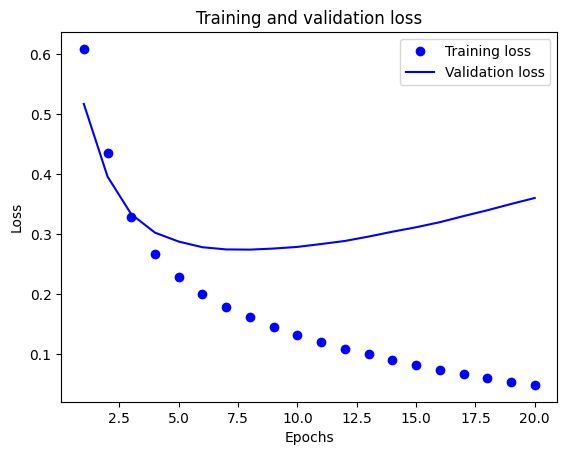

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

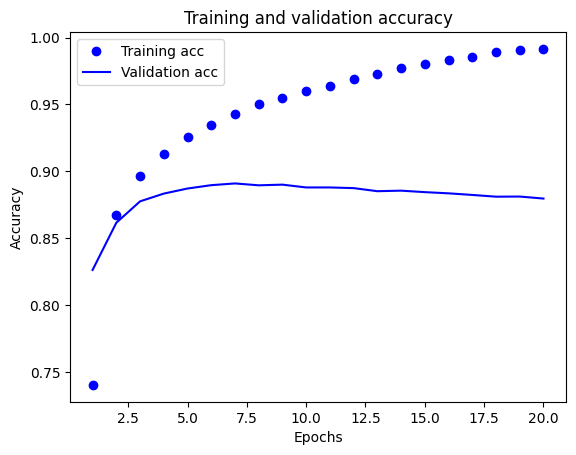

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8132 - loss: 0.4687
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9009 - loss: 0.2766
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9216 - loss: 0.2181
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9328 - loss: 0.1871
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8818 - loss: 0.2948


In [19]:
results

[0.29482027888298035, 0.8818399906158447]

### Using a trained model to generate predictions on new data

In [20]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step


array([[0.17153433],
       [0.99975705],
       [0.48014194],
       ...,
       [0.08397611],
       [0.06125703],
       [0.46924466]], shape=(25000, 1), dtype=float32)

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

More on the Dataset, cool explained example: https://martin-thoma.com/nlp-reuters/

46 different topics, at least 10 examples for each topic. 

In [21]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [22]:
len(train_data)

8982

In [33]:
len(test_data)

2246

In [34]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [23]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
train_labels[10]

np.int64(3)

### Preparing the data

**Encoding the input data**

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

So any idea what to do with the labels?

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Building your model

**Model definition**

Now we have way more classes to work with, and way more info that needs to diffrenciate between the data points.  
We need more neurons.  

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

We can create our own metric, as mentioned before! <br>
Eveyrhting depends on the problem and result we are looking for. 

In [29]:
top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(
    k=3, name="top_3_accuracy"
)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy", top_3_accuracy],
)

**Compiling the model**

In [30]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.4407 - loss: 2.6670 - val_accuracy: 0.6140 - val_loss: 1.8145
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6716 - loss: 1.5469 - val_accuracy: 0.6850 - val_loss: 1.3976
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7380 - loss: 1.1967 - val_accuracy: 0.7350 - val_loss: 1.2068
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7840 - loss: 0.9784 - val_accuracy: 0.7420 - val_loss: 1.1000
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8237 - loss: 0.8087 - val_accuracy: 0.7850 - val_loss: 0.9953
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8544 - loss: 0.6649 - val_accuracy: 0.7980 - val_loss: 0.9498
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8819 - loss: 0.5530 - val_accuracy: 0.8040 - val_loss: 0.9090
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9023 - loss: 0.4643 - val_accuracy: 0.8030 - v

**Plotting the training and validation loss**

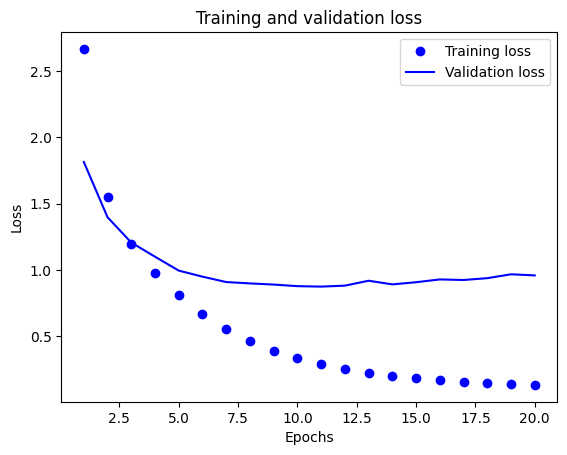

In [33]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

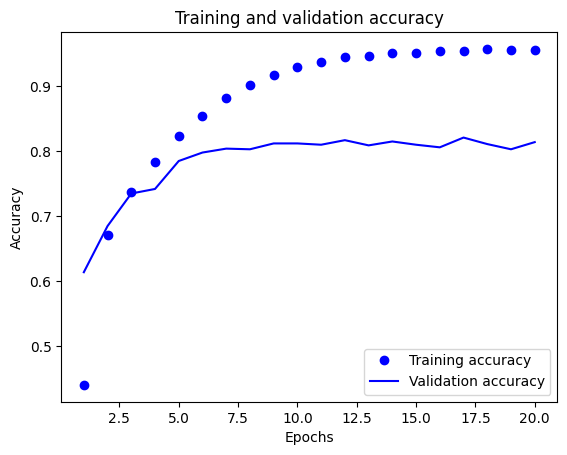

In [34]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [35]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5285 - loss: 2.5507
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6951 - loss: 1.4463
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7523 - loss: 1.1225
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8032 - loss: 0.9068
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8434 - loss: 0.7412
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8678 - loss: 0.6139
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8892 - loss: 0.5138
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9083 - loss: 0.4288
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9231 - loss: 0.3634
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7925 - loss: 0.9200


In [36]:
results

[0.9199947118759155, 0.7925200462341309]

What would be the random monkey-like accuracy on this 46 classes problem?

In [37]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.19323241317898487)

Check the new accuracy you can create yourself.

### Generating predictions on new data

In [38]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [39]:
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

np.float32(0.99999994)

In [41]:
np.argmax(predictions[0])

np.int64(3)

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [53]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3652 - loss: 2.9608 - val_accuracy: 0.3940 - val_loss: 2.4163
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4169 - loss: 2.1535 - val_accuracy: 0.4160 - val_loss: 2.0013
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5685 - loss: 1.6270 - val_accuracy: 0.6510 - val_loss: 1.4977
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6809 - loss: 1.2877 - val_accuracy: 0.6570 - val_loss: 1.3829
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7017 - loss: 1.1408 - val_accuracy: 0.6590 - val_loss: 1.3355
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7273 - loss: 1.0330 - val_accuracy: 0.6840 - val_loss: 1.3001
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7674 - loss: 0.9380 - val_accuracy: 0.7030 - val_loss: 1.3050
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7930 - loss: 0.8589 - val_accuracy: 0.7090 - val_los

Plot later the validation and training loss and accuracy.  
What happens with results and predictions with that small middle layer?